In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# correlaion of each target value

In [6]:
correlation_with_target = df.corr()['target'].abs().sort_values(ascending=False)
print(correlation_with_target)


target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [8]:
top_features = correlation_with_target[1:11].index  
print(top_features)

Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity', 'worst concavity'],
      dtype='object')


In [10]:
X = df[top_features]
y = df['target']

In [12]:
print(data.target_names)

['malignant' 'benign']


In [14]:
# count value
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [16]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred_LR = log_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Basic Evaluation:")
print("Accuracy:  ", accuracy_score(y_test, y_pred_LR))
print("Precision: ", precision_score(y_test, y_pred_LR))
print("Recall:    ", recall_score(y_test, y_pred_LR))
print("F1 Score:  ", f1_score(y_test, y_pred_LR))

Basic Evaluation:
Accuracy:   0.9736842105263158
Precision:  0.9857142857142858
Recall:     0.971830985915493
F1 Score:   0.9787234042553191


In [27]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR, target_names=['Cancer', 'Non-Cancer'])) 

              precision    recall  f1-score   support

      Cancer       0.95      0.98      0.97        43
  Non-Cancer       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [29]:
print("Extended Metrics:")
print("Precision (Macro):    ", precision_score(y_test, y_pred_LR, average='macro'))
print("Recall (Macro):       ", recall_score(y_test, y_pred_LR, average='macro'))
print("F1 Score (Macro):     ", f1_score(y_test, y_pred_LR, average='macro'))

print("Precision (Weighted): ", precision_score(y_test, y_pred_LR, average='weighted'))
print("Recall (Weighted):    ", recall_score(y_test, y_pred_LR, average='weighted'))
print("F1 Score (Weighted):  ", f1_score(y_test, y_pred_LR, average='weighted'))

Extended Metrics:
Precision (Macro):     0.9701298701298702
Recall (Macro):        0.9742875859810023
F1 Score (Macro):      0.9721203228173148
Precision (Weighted):  0.9739576213260425
Recall (Weighted):     0.9736842105263158
F1 Score (Weighted):   0.9737421322933159


# confusion matrix

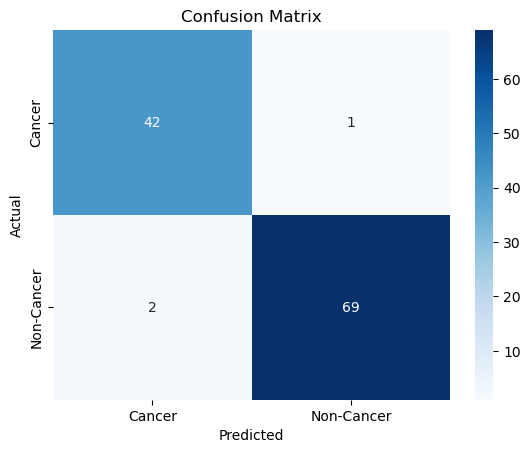

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cancer', 'Non-Cancer'], yticklabels=['Cancer', 'Non-Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_DT = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_DT )
prec_dt = precision_score(y_test, y_pred_DT )
rec_dt = recall_score(y_test,y_pred_DT )
f1_dt = f1_score(y_test,y_pred_DT )

print("Decision Tree - Basic Metrics:")
print(f"Accuracy:  {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall:    {rec_dt:.4f}")
print(f"F1 Score:  {f1_dt:.4f}")

Decision Tree - Basic Metrics:
Accuracy:  0.9298
Precision: 0.9315
Recall:    0.9577
F1 Score:  0.9444


In [37]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred_DT, target_names=data.target_names))


 Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.88      0.90        43
      benign       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [39]:
prec_macro_dt = precision_score(y_test,y_pred_DT, average='macro')
rec_macro_dt = recall_score(y_test,y_pred_DT, average='macro')
f1_macro_dt = f1_score(y_test, y_pred_DT, average='macro')

prec_weighted_dt = precision_score(y_test, y_pred_DT, average='weighted')
rec_weighted_dt = recall_score(y_test, y_pred_DT, average='weighted')
f1_weighted_dt = f1_score(y_test, y_pred_DT, average='weighted')

print("\n Extended Metrics (Decision Tree):")
print(f"Precision (Macro):     {prec_macro_dt:.4f}")
print(f"Recall (Macro):        {rec_macro_dt:.4f}")
print(f"F1 Score (Macro):      {f1_macro_dt:.4f}")
print(f"Precision (Weighted):  {prec_weighted_dt:.4f}")
print(f"Recall (Weighted):     {rec_weighted_dt:.4f}")
print(f"F1 Score (Weighted):   {f1_weighted_dt:.4f}")


 Extended Metrics (Decision Tree):
Precision (Macro):     0.9292
Recall (Macro):        0.9207
F1 Score (Macro):      0.9246
Precision (Weighted):  0.9297
Recall (Weighted):     0.9298
F1 Score (Weighted):   0.9295


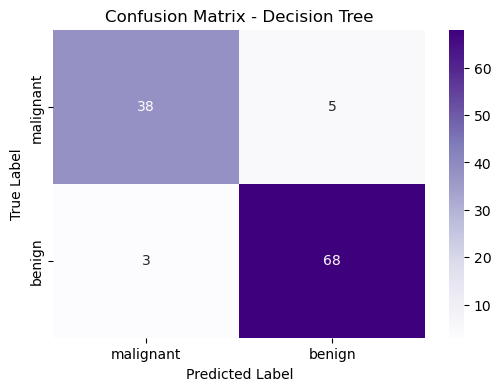

In [43]:
cm_dt = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples',xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_RF = rf_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_rf = accuracy_score(y_test, y_pred_RF)
prec_rf = precision_score(y_test, y_pred_RF)
rec_rf = recall_score(y_test, y_pred_RF)
f1_rf = f1_score(y_test,y_pred_RF)

print("Random Forest - Basic Metrics:")
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")

Random Forest - Basic Metrics:
Accuracy:  0.9561
Precision: 0.9583
Recall:    0.9718
F1 Score:  0.9650


In [50]:
from sklearn.metrics import classification_report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_RF, target_names=data.target_names))


 Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [52]:
prec_macro_rf = precision_score(y_test, y_pred_RF, average='macro')
rec_macro_rf = recall_score(y_test, y_pred_RF, average='macro')
f1_macro_rf = f1_score(y_test, y_pred_RF, average='macro')

prec_weighted_rf = precision_score(y_test, y_pred_RF, average='weighted')
rec_weighted_rf = recall_score(y_test,y_pred_RF, average='weighted')
f1_weighted_rf = f1_score(y_test, y_pred_RF, average='weighted')

print("\n Extended Metrics (Random Forest):")
print(f"Precision (Macro):     {prec_macro_rf:.4f}")
print(f"Recall (Macro):        {rec_macro_rf:.4f}")
print(f"F1 Score (Macro):      {f1_macro_rf:.4f}")
print(f"Precision (Weighted):  {prec_weighted_rf:.4f}")
print(f"Recall (Weighted):     {rec_weighted_rf:.4f}")
print(f"F1 Score (Weighted):   {f1_weighted_rf:.4f}")


 Extended Metrics (Random Forest):
Precision (Macro):     0.9554
Recall (Macro):        0.9510
F1 Score (Macro):      0.9531
Precision (Weighted):  0.9561
Recall (Weighted):     0.9561
F1 Score (Weighted):   0.9560


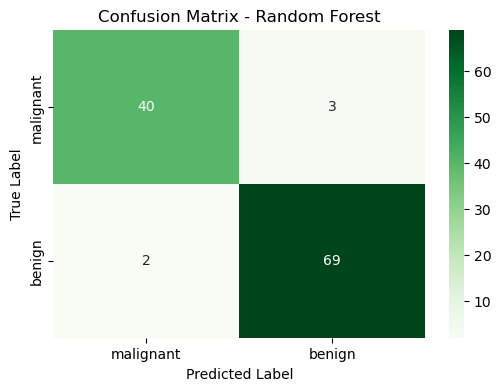

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test,y_pred_RF)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# support vector regressor

In [57]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train, y_train)
y_pred_SVM = svm_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_svm = accuracy_score(y_test, y_pred_SVM)
prec_svm = precision_score(y_test, y_pred_SVM)
rec_svm = recall_score(y_test, y_pred_SVM)
f1_svm = f1_score(y_test, y_pred_SVM)

print(" SVM - Basic Metrics:")
print(f"Accuracy:  {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall:    {rec_svm:.4f}")
print(f"F1 Score:  {f1_svm:.4f}")

 SVM - Basic Metrics:
Accuracy:  0.9825
Precision: 0.9859
Recall:    0.9859
F1 Score:  0.9859


In [61]:
from sklearn.metrics import classification_report
print("\n Classification Report (SVM):")
print(classification_report(y_test, y_pred_SVM, target_names=data.target_names))


 Classification Report (SVM):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [63]:
prec_macro_svm = precision_score(y_test, y_pred_SVM, average='macro')
rec_macro_svm = recall_score(y_test,y_pred_SVM, average='macro')
f1_macro_svm = f1_score(y_test, y_pred_SVM, average='macro')

prec_weighted_svm = precision_score(y_test, y_pred_SVM, average='weighted')
rec_weighted_svm = recall_score(y_test, y_pred_SVM, average='weighted')
f1_weighted_svm = f1_score(y_test, y_pred_SVM, average='weighted')

print("\n Extended Metrics (SVM):")
print(f"Precision (Macro):     {prec_macro_svm:.4f}")
print(f"Recall (Macro):        {rec_macro_svm:.4f}")
print(f"F1 Score (Macro):      {f1_macro_svm:.4f}")
print(f"Precision (Weighted):  {prec_weighted_svm:.4f}")
print(f"Recall (Weighted):     {rec_weighted_svm:.4f}")
print(f"F1 Score (Weighted):   {f1_weighted_svm:.4f}")


 Extended Metrics (SVM):
Precision (Macro):     0.9813
Recall (Macro):        0.9813
F1 Score (Macro):      0.9813
Precision (Weighted):  0.9825
Recall (Weighted):     0.9825
F1 Score (Weighted):   0.9825


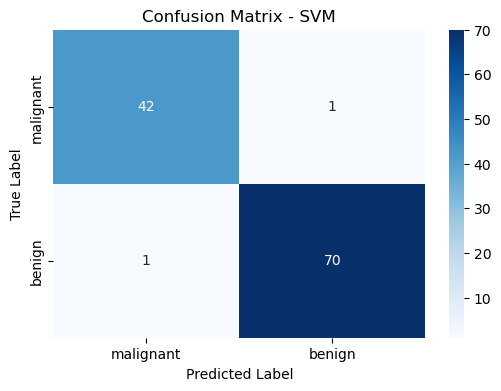

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test,y_pred_SVM)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_KNN = knn_model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_knn = accuracy_score(y_test, y_pred_KNN)
prec_knn = precision_score(y_test, y_pred_KNN)
rec_knn = recall_score(y_test, y_pred_KNN)
f1_knn = f1_score(y_test,y_pred_KNN)

print("KNN - Basic Metrics:")
print(f"Accuracy:  {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall:    {rec_knn:.4f}")
print(f"F1 Score:  {f1_knn:.4f}")

KNN - Basic Metrics:
Accuracy:  0.9737
Precision: 0.9857
Recall:    0.9718
F1 Score:  0.9787


In [72]:
from sklearn.metrics import classification_report
print("\n  Classification Report (KNN):")
print(classification_report(y_test, y_pred_KNN, target_names=data.target_names))


  Classification Report (KNN):
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [74]:
prec_macro_knn = precision_score(y_test, y_pred_KNN, average='macro')
rec_macro_knn = recall_score(y_test, y_pred_KNN, average='macro')
f1_macro_knn = f1_score(y_test, y_pred_KNN, average='macro')

prec_weighted_knn = precision_score(y_test, y_pred_KNN, average='weighted')
rec_weighted_knn = recall_score(y_test,y_pred_KNN, average='weighted')
f1_weighted_knn = f1_score(y_test, y_pred_KNN, average='weighted')

print("\n Extended Metrics (KNN):")
print(f"Precision (Macro):     {prec_macro_knn:.4f}")
print(f"Recall (Macro):        {rec_macro_knn:.4f}")
print(f"F1 Score (Macro):      {f1_macro_knn:.4f}")
print(f"Precision (Weighted):  {prec_weighted_knn:.4f}")
print(f"Recall (Weighted):     {rec_weighted_knn:.4f}")
print(f"F1 Score (Weighted):   {f1_weighted_knn:.4f}")


 Extended Metrics (KNN):
Precision (Macro):     0.9701
Recall (Macro):        0.9743
F1 Score (Macro):      0.9721
Precision (Weighted):  0.9740
Recall (Weighted):     0.9737
F1 Score (Weighted):   0.9737


C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128095 (\N{ATHLETIC SHOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


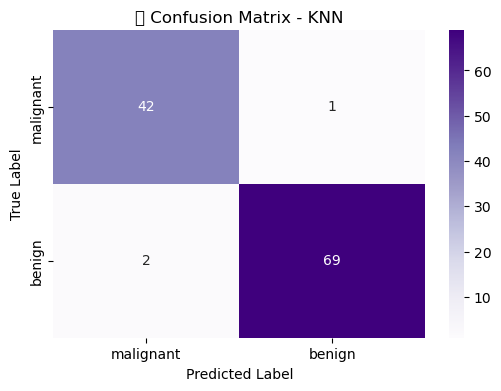

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples',xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("👟 Confusion Matrix - KNN")
plt.show()

# COMPARISON

In [79]:
from sklearn.metrics import f1_score
import pandas as pd

f1_scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest'],
    'F1 Macro': [
        f1_score(y_test, y_pred_LR, average='macro'),
        f1_score(y_test, y_pred_DT, average='macro'),
        f1_score(y_test, y_pred_KNN, average='macro'),
        f1_score(y_test, y_pred_SVM, average='macro'),
        f1_score(y_test, y_pred_RF, average='macro')
    ],
    'F1 Weighted': [
        f1_score(y_test, y_pred_LR, average='weighted'),
        f1_score(y_test, y_pred_DT, average='weighted'),
        f1_score(y_test, y_pred_KNN, average='weighted'),
        f1_score(y_test, y_pred_SVM, average='weighted'),
        f1_score(y_test, y_pred_RF, average='weighted')
    ]
}
f1_df = pd.DataFrame(f1_scores)
f1_df_sorted = f1_df.sort_values(by='F1 Weighted', ascending=False)

print("\n Model Comparison Based on F1 Scores:")
print(f1_df_sorted.to_string(index=False))


 Model Comparison Based on F1 Scores:
              Model  F1 Macro  F1 Weighted
                SVM  0.981330     0.982456
Logistic Regression  0.972120     0.973742
                KNN  0.972120     0.973742
      Random Forest  0.953106     0.956036
      Decision Tree  0.924603     0.929476


In [ ]:
#Best Model: Logistic Regression
#It has the highest F1 Macro (0.9719) and F1 Weighted (0.9736).
#This indicates that it performs consistently well across all classes, and especially on more common ones.